## Data preparation and cleaning

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
df=pd.read_csv(r'Location_Data.csv',encoding='windows-1252')
#removing rows that have 0 as a value in 'prix en MAD' column
df=df[df['prix en MAD']!=0]

In [27]:
#getting the percent of missing value in each column
df.isnull().sum()

prix en MAD               0
emplacement               0
surface en m²           436
nombre des pièces       459
nombre des chambres      79
numéro d'étage         5650
dtype: int64

In [28]:
df.describe()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage
count,1.690000e+04,16464.000000,16441.000000,16821.000000,11250.000000
mean,9.789312e+03,111.756195,3.354236,2.154509,3.148622
std,7.085098e+04,137.200100,1.268343,0.793457,2.077259
min,1.300000e+02,11.000000,1.000000,1.000000,1.000000
25%,5.000000e+03,70.000000,3.000000,2.000000,2.000000
50%,7.500000e+03,100.000000,3.000000,2.000000,3.000000
75%,1.050000e+04,133.000000,4.000000,3.000000,4.000000
max,5.000000e+06,10530.000000,13.000000,7.000000,20.000000


In [29]:
df.head()

,prix en MAD,emplacement,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage
0,15000,Rabat Rabat-Salé-Zemmour-Zaër,170.0,5.0,3.0,1.0
1,8500,Casablanca Casablanca-Settat,95.0,3.0,2.0,NaN
2,10000,Bouskoura Casablanca-Settat,140.0,4.0,3.0,2.0
3,3700,Kénitra Rabat-Salé-Zemmour-Zaër,80.0,3.0,2.0,2.0
4,6500,Casablanca Casablanca-Settat,80.0,3.0,2.0,4.0


In [30]:
df["numéro d'étage"].value_counts()

2.0     2700
3.0     2422
1.0     2203
4.0     1816
5.0     1154
6.0      387
7.0      252
8.0       87
10.0      66
9.0       59
11.0      23
20.0      21
12.0      13
15.0      11
13.0       9
14.0       9
18.0       7
16.0       6
17.0       4
19.0       1
Name: numéro d'étage, dtype: int64

In [264]:
#coding the categorical attribut 'emplacement'
l=list(df['emplacement'].unique())
n=len(l)
code={}
for i in range(n):
    code[l[i]]=i
code
df['emplacementMap']=df['emplacement'].map(code)
df.head()
df2=df.drop(columns=['emplacement'],axis=1)
df2.head()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
0,15000,170.0,5.0,3.0,1.0,0
1,8500,95.0,3.0,2.0,NaN,1
2,10000,140.0,4.0,3.0,2.0,2
3,3700,80.0,3.0,2.0,2.0,3
4,6500,80.0,3.0,2.0,4.0,1


In [265]:
emplacement_id={'emplacement':list(code.keys()),'id':list(code.values())}    
emplacement_id=pd.DataFrame(data=emplacement_id)
emplacement_id.to_csv('emplacement_id.csv',index=False)

In [266]:
#handling missing values using KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df2= pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)
df2["numéro d'étage"]=df2["numéro d'étage"].map(round)
df2["nombre des pièces"]=df2["nombre des pièces"].map(round)
df2["emplacementMap"]=df2["emplacementMap"].map(round)
df2["nombre des chambres"]=df2["nombre des chambres"].map(round)
df2["surface en m²"]=df2["surface en m²"].map(round)
df2.head()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
0,15000.0,170,5,3,1,0
1,8500.0,95,3,2,3,1
2,10000.0,140,4,3,2,2
3,3700.0,80,3,2,2,3
4,6500.0,80,3,2,4,1


In [251]:
#saving the clean dataframe to csv file
df2.to_csv('Clean_location_data.csv',index=False)

In [252]:
df2.isnull().sum()

prix en MAD            0
surface en m²          0
nombre des pièces      0
nombre des chambres    0
numéro d'étage         0
emplacementMap         0
dtype: int64

In [261]:
df2.corr()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
prix en MAD,1.000000,0.088974,0.049941,0.054276,0.019445,0.023787
surface en m²,0.088974,1.000000,0.253428,0.288078,0.045714,-0.036042
nombre des pièces,0.049941,0.253428,1.000000,0.736552,0.063248,-0.041069
nombre des chambres,0.054276,0.288078,0.736552,1.000000,0.065384,-0.011202
numéro d'étage,0.019445,0.045714,0.063248,0.065384,1.000000,-0.126237
emplacementMap,0.023787,-0.036042,-0.041069,-0.011202,-0.126237,1.000000


In [418]:
df3=df2[(df2['prix en MAD']<=30000)&(df2['prix en MAD']>=250)&
       (df2['surface en m²']<=325)&(df2['surface en m²']>=50)&
       (df2['emplacementMap']<=48)&(df2['nombre des pièces']<=10)&(df2['nombre des pièces']>1)&(df2['numéro d\'étage']!=19)&
       (df2['nombre des chambres']>1)]

In [419]:
df3.corr()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
prix en MAD,1.000000,0.724114,0.353243,0.415611,0.174957,-0.370343
surface en m²,0.724114,1.000000,0.509723,0.608511,0.136421,-0.225554
nombre des pièces,0.353243,0.509723,1.000000,0.613749,0.066279,-0.110812
nombre des chambres,0.415611,0.608511,0.613749,1.000000,0.079605,-0.118847
numéro d'étage,0.174957,0.136421,0.066279,0.079605,1.000000,-0.126952
emplacementMap,-0.370343,-0.225554,-0.110812,-0.118847,-0.126952,1.000000


In [420]:
len(df3)

12821

## Descriptive statistics

<AxesSubplot:xlabel='surface en m²', ylabel='prix en MAD'>

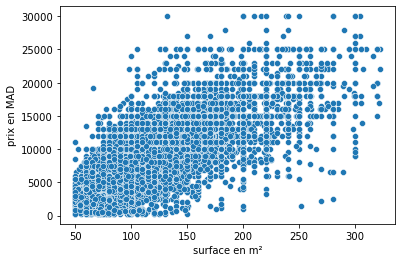

In [391]:
#prix en fonction de la surface
sns.scatterplot(data=df3,x='surface en m²',y='prix en MAD')

<AxesSubplot:xlabel='emplacementMap', ylabel='prix en MAD'>

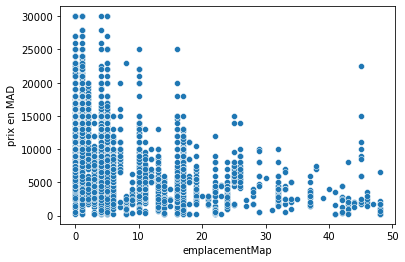

In [392]:
sns.scatterplot(data=df3,x='emplacementMap',y='prix en MAD')

<AxesSubplot:xlabel='surface en m²', ylabel='prix en MAD'>

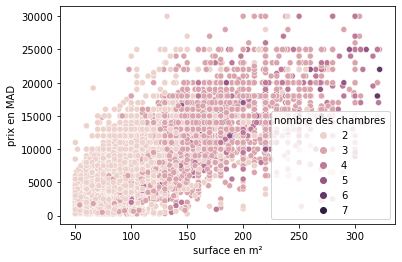

In [393]:
sns.scatterplot(data=df3,x='surface en m²',y='prix en MAD',hue='nombre des chambres')

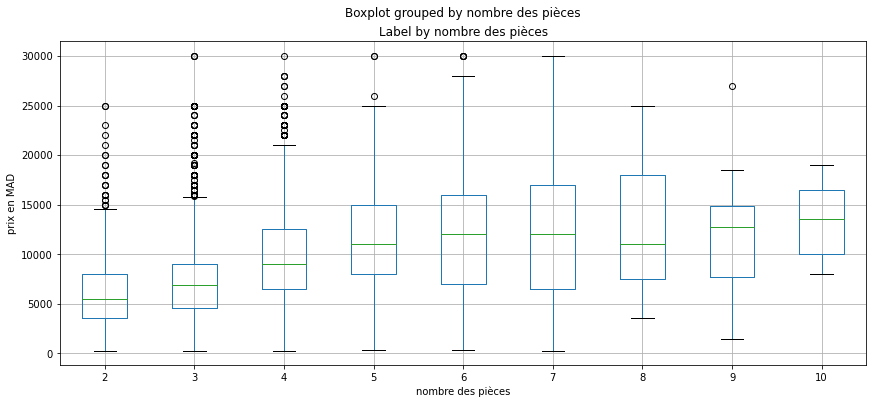

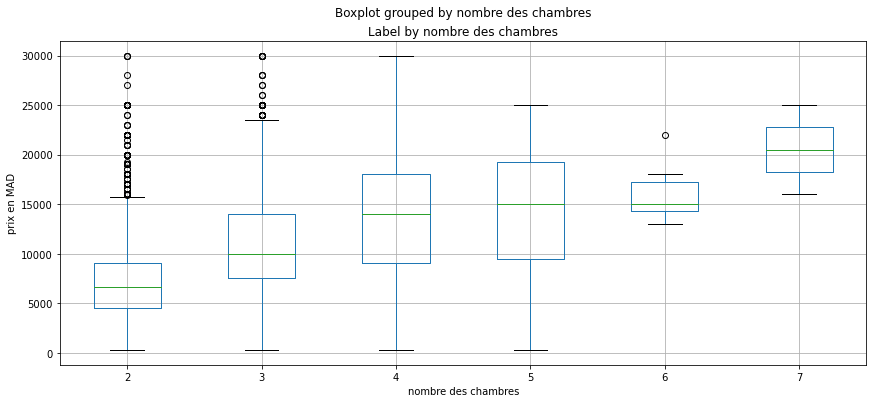

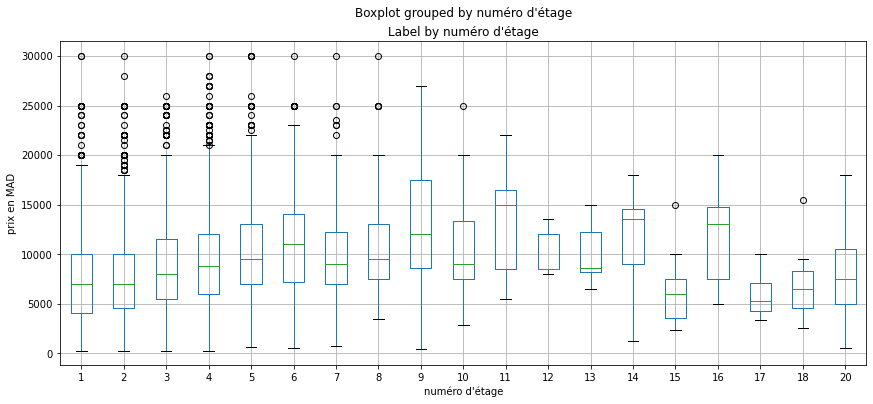

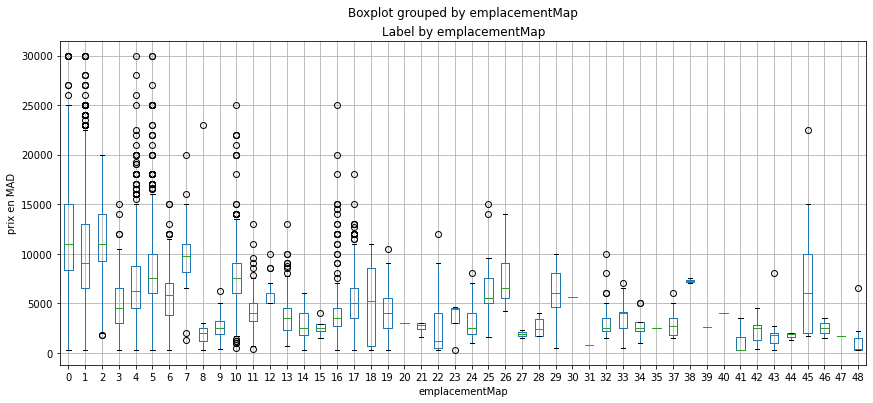

In [394]:
categorical_features=['nombre des pièces','nombre des chambres','numéro d\'étage','emplacementMap']
for col in categorical_features:
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    df3.boxplot(column = 'prix en MAD', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("prix en MAD")
plt.show()

# Predicting  the dependent variable '' prix en MAD '' 

## Using multiple linear regression

In [377]:
#spliting dataset into traning and testing datasets
from sklearn.model_selection import train_test_split
X=df3[['surface en m²', 'nombre des pièces','nombre des chambres', 'numéro d\'étage', 'emplacementMap']]
Y=df3['prix en MAD']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 8924 rows
Test Set: 3825 rows


In [452]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_features=np.array(df3['prix en MAD']).reshape(-1,1)
num_tran=Pipeline(steps=('scaler',StandardScaler().fit_transform(num_features)))
preprocessor=ColumnTransformer(transformers=[('num',num_tran,num_features)])
pipeline=Pipeline(steps=[('regressor',linear_model.LinearRegression())])
model=pipeline.fit(X_train,y_train)
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green')
plt.show()

ValueError: too many values to unpack (expected 2)

### Using lasso algorithm for regression

MSE: 10735949.5282047
RMSE: 3276.575884701085
R2: 0.5518833297862759


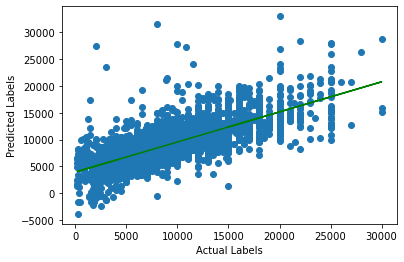

In [334]:
pipeline=Pipeline(steps=[('regressor',linear_model.Lasso())])
model=pipeline.fit(X_train,y_train)
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green')
plt.show()

### Using polynomial regression with grid search for hyper parameters optimization

MSE: 10425333.60476583
RMSE: 3228.828518947055
R2: 0.5623468573603647


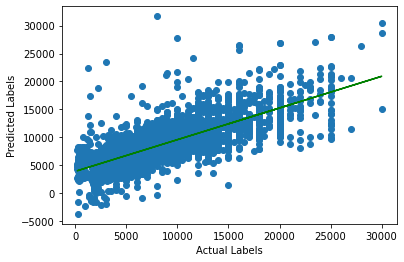

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
param_grid={'poly__degree':[2,3,4,5,6,7,8,9]}
pipeline=Pipeline(steps=[('poly',PolynomialFeatures()),('modal',linear_model.LinearRegression())])
grid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green')
plt.show()

### Using a Decision Tree Algorithm 

MSE: 14165822.56035584
RMSE: 3763.751128907946
R2: 0.40532197849466955


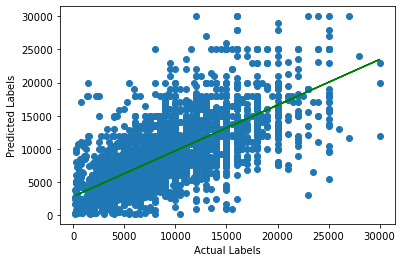

In [282]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor().fit(X_train,y_train)
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green')
plt.show()

### Using an Ensemble algorithm

#### Random Forest model

MSE: 9920683.581741683
RMSE: 3149.7116664453088
R2: 0.5811126384796861


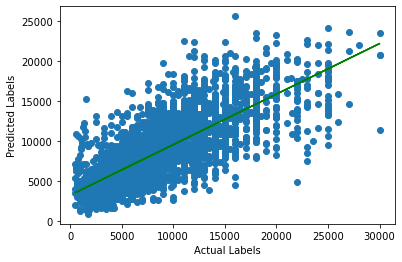

In [380]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(X_train,y_train)
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green')
plt.show()

#### Using a Gradient Boosting Estimator

MSE: 8895774.06327728
RMSE: 2982.578425335582
R2: 0.6243880479259409


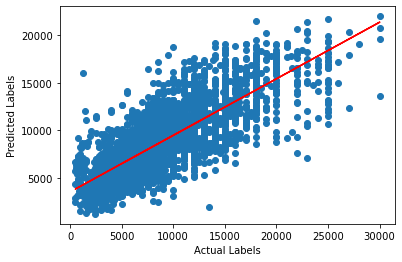

In [446]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }
alg=GradientBoostingRegressor()
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train,y_train)
model=gridsearch.best_estimator_
# Get predictions
predictions = model.predict(X_test)
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')
plt.show()

In [445]:
pd.DataFrame({'Prix Original':y_test,'Prix éstimé':model.predict(X_test)}).sample(15)

,Prix Original,Prix éstimé
12706,3500.0,4008.753852
11560,16000.0,13382.121591
2578,5700.0,6737.369345
10028,12000.0,14356.277924
11850,12000.0,11092.906027
15972,8500.0,6283.673380
16181,15000.0,14493.444469
4407,10000.0,13026.780985
13675,7000.0,9540.099066
16121,10000.0,8740.174330


> After trying multiple algorithms, finally we found that the model created using gradient boosting regressor with hyperparameters using a grid search have the highest R2 coefficient, so it's the most accurate model among others